# INF2008 Group P5-1 
# Singapore HDB Resale Price Prediction

# 1. Problem Statement

HDB flats are often labelled as the government's first gift to Singaporeans, leading majority of the population living in them. While many Singaporeans acquire their homes through the Build-to-Order (BTO) scheme, a considerable number of people choose to purchase flats on the resale market due to various reasons.

Throughout the years, it has become a known fact that purchasing a home is often the largest financial decision most people will make, it is essential to ensure that the price paid reflects the property's true value. Overpaying for a flat could lead to significant financial setbacks, sometimes amounting to tens or even hundreds of thousands of dollars.

Determining the right price for a HDB resale flat is complicated, as there are many factors that influence housing prices, giving buyers a hard time in determining the best home for their future. This project aims to tackle the challenge of accurately estimating resale values.

Key Question:
**<center>How can we effectively forecast the resale price of an HDB flat using relevant data?</center>**

This initiative seeks to empower buyers by providing clarity on the factors that drive resale prices, helping them make sound financial decisions when selecting resale flats. To achieve this, a linear regression model will be utilized, with resale price as the outcome variable and key housing-related factors as predictors.

Model performance will be evaluated using the Root Mean Square Error (RMSE), where a smaller RMSE reflects better predictive accuracy.

The project’s primary beneficiaries are home buyers seeking guidance on fair pricing. Additionally, housing agents, who play a critical role in advising buyers, will also find the insights valuable.

# 2. Data Collection

### 2.1 Data Import

Let us start off by importing the combined dataset.

In [42]:
%pip install pandas matplotlib numpy plotly nbformat seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 2.8 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/11.1 MB 3.4 MB/s eta 0:00:03
   -------- ------------------------------- 2.4/11.1 MB 3.8 MB/s eta 0:00:03
   ----------- ---------------------------- 3.1/11.1 MB 3.9 MB/s eta 0:00:03
   ------------ --------------------------- 3.4/11.1 MB 3.9 MB/s eta 0:00:02
   --------------- ------------------------ 4.2/11.1 MB 3.5 MB/s eta 0:00:02
   ----------------- ---------------------- 5.0/11.1 MB 3.5 MB/s eta 0:00:02
   -------------------- ------------------- 5.8/11.1 MB 3.5 MB/s eta 0:00:02
   ----------------------- ---------------- 6.6/11.1 MB 3.5 MB/s eta 0:00:02
   -------------------------- ------------- 7.3/11.1 MB 3.6 MB/s eta 0:00:02
   ----------------------------- ---------- 8.1/11.1 MB 3.6 MB/s eta 0:00:01
   --


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
# Importing data.
df = pd.read_csv('../dataset/combined_data.csv')

In [45]:
print(df.shape)
df.head(10)

(235565, 11)


month        town flat_type block        street_name storey_range  \
0  2015-01  ANG MO KIO    3 ROOM   174   ANG MO KIO AVE 4     07 TO 09   
1  2015-01  ANG MO KIO    3 ROOM   541  ANG MO KIO AVE 10     01 TO 03   
2  2015-01  ANG MO KIO    3 ROOM   163   ANG MO KIO AVE 4     01 TO 03   
3  2015-01  ANG MO KIO    3 ROOM   446  ANG MO KIO AVE 10     01 TO 03   
4  2015-01  ANG MO KIO    3 ROOM   557  ANG MO KIO AVE 10     07 TO 09   
5  2015-01  ANG MO KIO    3 ROOM   603   ANG MO KIO AVE 5     07 TO 09   
6  2015-01  ANG MO KIO    3 ROOM   709   ANG MO KIO AVE 8     01 TO 03   
7  2015-01  ANG MO KIO    3 ROOM   333   ANG MO KIO AVE 1     01 TO 03   
8  2015-01  ANG MO KIO    3 ROOM   109   ANG MO KIO AVE 4     01 TO 03   
9  2015-01  ANG MO KIO    3 ROOM   564   ANG MO KIO AVE 3     13 TO 15   

   floor_area_sqm      flat_model  lease_commence_date remaining_lease  \
0            60.0        Improved                 1986              70   
1            68.0  New Generation                 1981              65   
2            69.0  New Generation                 1980              64   
3            68.0  New Generation                 1979              63   
4            68.0  New Generation                 1980              64   
5            67.0  New Generation                 1980              64   
6            68.0  New Generation                 1980              64   
7            68.0  New Generation                 1981              65   
8            67.0  New Generation                 1978              62   
9            68.0  New Generation                 1985              69   

   resale_price  
0      255000.0  
1      275000.0  
2      285000.0  
3      290000.0  
4      290000.0  
5      290000.0  
6      290000.0  
7      293000.0  
8      300000.0  
9      307500.0

As shown above, we have a total of up to 235,565 datasets with 11 columns, now we will walk through the data cleaning process.

# 3 Data Preprocessing 

### 3.1 Handling Duplicate Values

In [46]:
df.duplicated().sum()
df[df.duplicated()]

month             town flat_type block         street_name  \
661     2015-01  KALLANG/WHAMPOA    3 ROOM    57       GEYLANG BAHRU   
2166    2015-02         TAMPINES    3 ROOM   403      TAMPINES ST 41   
3896    2015-04            BEDOK    4 ROOM   701  BEDOK RESERVOIR RD   
4246    2015-04         CLEMENTI    3 ROOM   714  CLEMENTI WEST ST 2   
5493    2015-05            BEDOK    3 ROOM   409     BEDOK NTH AVE 2   
...         ...              ...       ...   ...                 ...   
225347  2024-10         SENGKANG    4 ROOM  329B       ANCHORVALE ST   
226620  2024-05         SENGKANG    5 ROOM  430D       FERNVALE LINK   
228223  2024-12         TAMPINES    4 ROOM  612A   TAMPINES NTH DR 1   
233098  2024-01           YISHUN    4 ROOM  462C        YISHUN AVE 6   
234582  2025-01          GEYLANG    4 ROOM   82B          CIRCUIT RD   

       storey_range  floor_area_sqm      flat_model  lease_commence_date  \
661        16 TO 18            65.0        Improved                 1974   
2166       07 TO 09            69.0        Improved                 1985   
3896       10 TO 12            93.0  New Generation                 1980   
4246       10 TO 12            67.0  New Generation                 1980   
5493       07 TO 09            68.0  New Generation                 1980   
...             ...             ...             ...                  ...   
225347     10 TO 12            93.0         Model A                 2015   
226620     19 TO 21           112.0        Improved                 2015   
228223     10 TO 12            93.0         Model A                 2020   
233098     01 TO 03            93.0         Model A                 2019   
234582     19 TO 21            93.0         Model A                 2020   

           remaining_lease  resale_price  
661                     58      315000.0  
2166                    69      350000.0  
3896                    64      400000.0  
4246                    64      300000.0  
5493                    63      340000.0  
...                    ...           ...  
225347  89 years 11 months      695000.0  
226620   90 years 01 month      770000.0  
228223  94 years 11 months      780000.0  
233098  94 years 08 months      530000.0  
234582  94 years 05 months     1018000.0  

[321 rows x 11 columns]

As reflected, we have identified 321 rows x 11 columns of duplicated data, now let us drop the duplicated data.

In [47]:
df = df.drop_duplicates()

# Looking for columns with null values
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

As shown above, we have detected no null values within the dataset.

### 3.2 Transforming remaining_lease

Due to the combination of datasets, we have identified that the remaining_lease columns are not consistent in terms of the units defined. Therefore, we decided to normalise them in years format.

In [48]:
# Calculate remaining lease using lease commence date
current_year = 2025  # Replace with the relevant current year
df['remaining_lease'] = 99 - (current_year - df['lease_commence_date'])

# Ensure no negative values (clip to 0 for expired leases)
df['remaining_lease'] = df['remaining_lease'].clip(lower=0)


In [49]:
df.tail(10) #The last 10 rows

month    town  flat_type block     street_name storey_range  \
235555  2025-01  YISHUN     5 ROOM   238  YISHUN RING RD     01 TO 03   
235556  2025-01  YISHUN     5 ROOM   109  YISHUN RING RD     07 TO 09   
235557  2025-01  YISHUN     5 ROOM   297    YISHUN ST 20     01 TO 03   
235558  2025-01  YISHUN     5 ROOM   265    YISHUN ST 22     01 TO 03   
235559  2025-01  YISHUN     5 ROOM  511B    YISHUN ST 51     10 TO 12   
235560  2025-01  YISHUN     5 ROOM  502B    YISHUN ST 51     07 TO 09   
235561  2025-01  YISHUN     5 ROOM   871    YISHUN ST 81     07 TO 09   
235562  2025-01  YISHUN     5 ROOM   851    YISHUN ST 81     10 TO 12   
235563  2025-01  YISHUN  EXECUTIVE   352  YISHUN RING RD     04 TO 06   
235564  2025-01  YISHUN  EXECUTIVE   614    YISHUN ST 61     04 TO 06   

        floor_area_sqm  flat_model  lease_commence_date  remaining_lease  \
235555           127.0    Improved                 1985               59   
235556           121.0    Improved                 1982               56   
235557           111.0    Improved                 2000               74   
235558           122.0    Improved                 1986               60   
235559           113.0    Improved                 2017               91   
235560           112.0    Improved                 2018               92   
235561           122.0    Improved                 1988               62   
235562           127.0    Improved                 1988               62   
235563           146.0  Maisonette                 1988               62   
235564           146.0  Maisonette                 1987               61   

        resale_price  
235555      650000.0  
235556      695000.0  
235557      608000.0  
235558      625000.0  
235559      730000.0  
235560      776000.0  
235561      738000.0  
235562      740000.0  
235563     1008000.0  
235564      800000.0

Using this example, this is to illustrate the changes made for remaining_lease on the second half of the dataset from years and months into years only.

### 3.3 Handling Data Types

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235244 entries, 0 to 235564
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                235244 non-null  object 
 1   town                 235244 non-null  object 
 2   flat_type            235244 non-null  object 
 3   block                235244 non-null  object 
 4   street_name          235244 non-null  object 
 5   storey_range         235244 non-null  object 
 6   floor_area_sqm       235244 non-null  float64
 7   flat_model           235244 non-null  object 
 8   lease_commence_date  235244 non-null  int64  
 9   remaining_lease      235244 non-null  int64  
 10  resale_price         235244 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 21.5+ MB


### 3.4 Transforming storey_range



As storey_range are values that are categorical e.g. 4 TO 6, we need to transform them to a median value such that it allows us to have more accurate insights when identifying trends or relationships as the different storey levels affects HDB prices. By transforming them to numerical data allows us to have an easier time when creating our models.

In [51]:
# Transform storey_range values to median values

def convert_to_median(row):
	storey_range = row["storey_range"].split(" TO ")
	median = (int(storey_range[0]) + int(storey_range[1])) / 2
	return median

df["median_storey"] = df.apply(convert_to_median, axis=1)
df = df.drop(columns=['storey_range'])

In [52]:
df.tail()

month    town  flat_type block     street_name  floor_area_sqm  \
235560  2025-01  YISHUN     5 ROOM  502B    YISHUN ST 51           112.0   
235561  2025-01  YISHUN     5 ROOM   871    YISHUN ST 81           122.0   
235562  2025-01  YISHUN     5 ROOM   851    YISHUN ST 81           127.0   
235563  2025-01  YISHUN  EXECUTIVE   352  YISHUN RING RD           146.0   
235564  2025-01  YISHUN  EXECUTIVE   614    YISHUN ST 61           146.0   

        flat_model  lease_commence_date  remaining_lease  resale_price  \
235560    Improved                 2018               92      776000.0   
235561    Improved                 1988               62      738000.0   
235562    Improved                 1988               62      740000.0   
235563  Maisonette                 1988               62     1008000.0   
235564  Maisonette                 1987               61      800000.0   

        median_storey  
235560            8.0  
235561            8.0  
235562           11.0  
235563            5.0  
235564            5.0

### 3.5 Transforming flat_type and flat_model

Since flat_type and flat_model are ordinal data as they have an ordinal relationship, we will assign a unique integer to each category such that they still have their fixed ranking.

# 4 Data Analysis

### 4.1 Distribution of Dependent Variables

In [53]:
df['resale_price'].describe()

count    2.352440e+05
mean     4.977054e+05
std      1.741972e+05
min      1.400000e+05
25%      3.700000e+05
50%      4.638880e+05
75%      5.950000e+05
max      1.600000e+06
Name: resale_price, dtype: float64

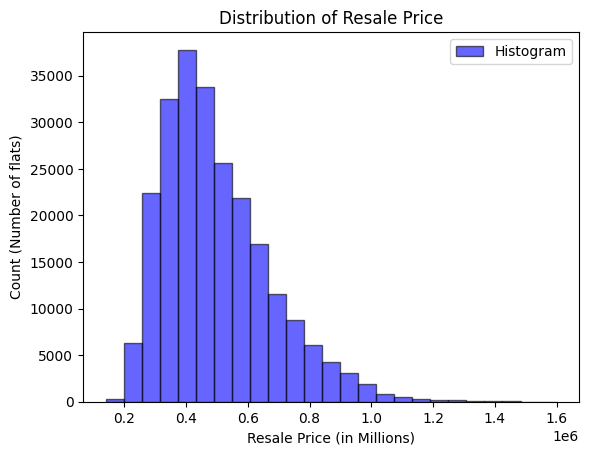

In [54]:

# Create histogram
data = df['resale_price']
plt.hist(data, bins=25, alpha=0.6, color='b', edgecolor='black', label='Histogram')

# Add titles and labels
plt.title('Distribution of Resale Price')
plt.xlabel('Resale Price (in Millions)')
plt.ylabel('Count (Number of flats)')

# Add legend
plt.legend()

# Show plot
plt.show()

Interpretation: The resale price distribution is slightly left-skewed, with the majority of flats priced in the lower range. However, the tail extends toward higher prices, indicating the presence of some higher-value properties, which aligns with the trends observed in the summary statistics.

Let us get a better understanding of our resale price by breaking it across features.

C:\Users\aaron\AppData\Local\Temp\ipykernel_27296\4212493500.py:10: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



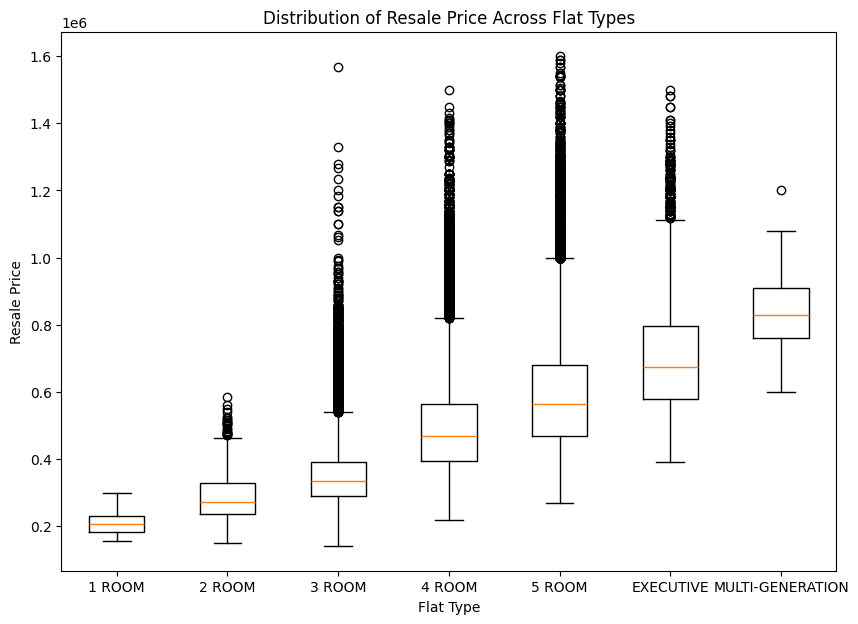

In [55]:
# Define flat type order
flat_type_order = ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION']

# Reorder the data to follow the specified flat type order
df['flat_type'] = pd.Categorical(df['flat_type'], categories=flat_type_order, ordered=True)
df = df.sort_values('flat_type')

# Create the boxplot
plt.figure(figsize=(10, 7))
plt.boxplot(
    [df.loc[df['flat_type'] == flat_type, 'resale_price'] for flat_type in flat_type_order],
    labels=flat_type_order
)

# Add title and labels
plt.title('Distribution of Resale Price Across Flat Types')
plt.xlabel('Flat Type')
plt.ylabel('Resale Price')

# Show the plot
plt.show()

Larger flat types generally have higher resale prices, with 1 ROOM and 2 ROOM flats being the cheapest and EXECUTIVE and MULTI-GENERATION flats being the most expensive. Smaller flats have more consistent prices, while larger ones show more variation and include higher-priced outliers. Some 5 ROOM and EXECUTIVE flats are priced over $1.5 million, likely due to premium locations or features.

C:\Users\aaron\AppData\Local\Temp\ipykernel_27296\3469271478.py:12: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



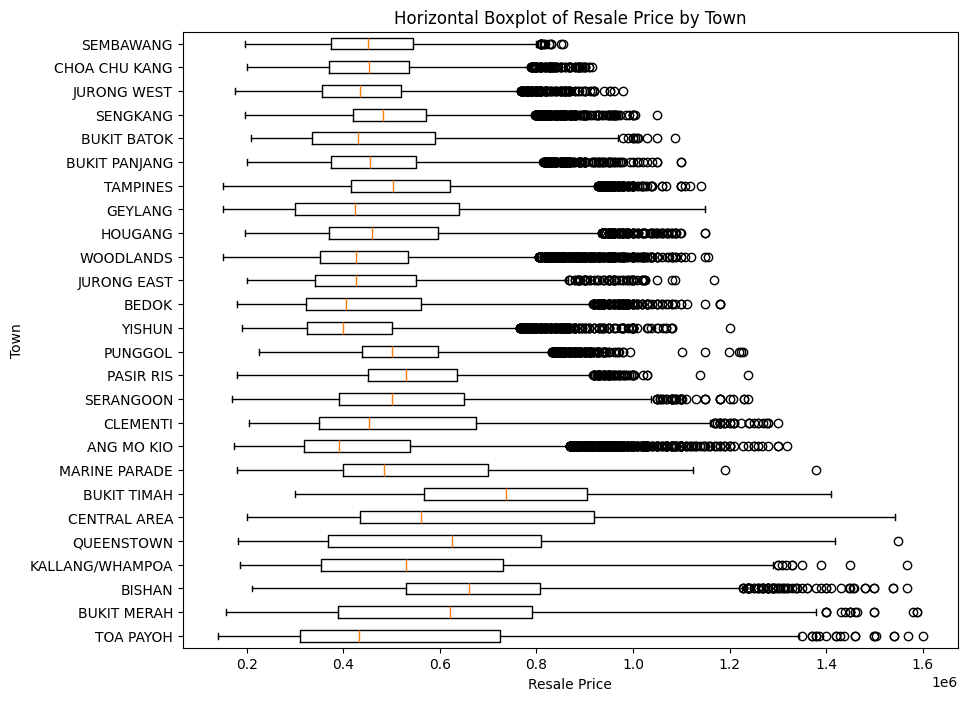

In [56]:
# Sort the DataFrame by resale_price
sorted_df = df.sort_values(by='resale_price', ascending=False)

# Get unique towns
towns = sorted_df['town'].unique()

# Prepare data for the boxplot
data = [sorted_df.loc[sorted_df['town'] == town, 'resale_price'] for town in towns]

# Create the horizontal boxplot
plt.figure(figsize=(10, 8))
plt.boxplot(data, vert=False, labels=towns)

# Add labels and title
plt.xlabel('Resale Price')  # Set the x-axis label
plt.ylabel('Town')  # Set the y-axis label
plt.title('Horizontal Boxplot of Resale Price by Town')  # Set the title

# Show the plot
plt.show()

Interpretation: Resale prices vary a lot depending on the location and nearby facilities. Central towns like Bukit Timah, Queenstown, and Central Area are more expensive because they’re closer to the city, well-connected, and have more amenities. Suburban towns like Sembawang and Choa Chu Kang are cheaper since they’re farther from the city and less developed. Prices can also go up in towns near MRT stations, good schools, or malls. The high-priced outliers in some towns might be due to unique features or very desirable locations.

## 4.2 Scatterplots of Strongest Independent Varables against Dependent Variables

### 4.2.1 Relationship between Floor Area and Resale Price

In [57]:
import plotly.express as px
import nbformat


scatterplt = px.scatter(
    df,
    x='floor_area_sqm',
    y='resale_price',
    color='flat_type',  # Optional: Add this for color differentiation
    title='Relationship Between Floor Area and Resale Price',
    width=900,
    height=800
)

scatterplt.show()



Interpretation: The scatterplot reveals a clear positive relationship between floor area and resale price, indicating that larger flats tend to have higher resale prices. Smaller flats, such as 1 ROOM and 2 ROOM, are concentrated in the lower left of the plot, with smaller floor areas and lower resale prices. In contrast, larger flats like EXECUTIVE and MULTI-GENERATION are positioned in the upper right, reflecting their bigger floor areas and significantly higher prices. Each flat type forms distinct clusters, suggesting that floor area strongly correlates with both the flat type and its price. However, there are some outliers, where certain flats have much higher prices than expected for their size, likely due to other factors such as location, condition, or special features. Overall, the plot highlights that while larger floor areas generally lead to higher prices, other variables also play a role in determining resale value.

### 4.2.2 Relationship between Lease Commence Date and Resale Price

In [58]:
# Group by 'lease_commence_date' and calculate the average resale price
avg_price_by_lease = df.groupby('lease_commence_date')['resale_price'].mean().reset_index()

# Create the line plot
fig = px.line(
    avg_price_by_lease,
    x='lease_commence_date',
    y='resale_price',
    title='Average Resale Price by Lease Commencement Year',
    labels={
        'lease_commence_date': 'Lease Commencement Year',
        'resale_price': 'Average Resale Price'
    },
    width=900,
    height=600,
    markers=True  # Add markers to the line
)

# Customize layout
fig.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    xaxis_tickangle=45,  # Rotate x-axis labels if needed
    template='plotly_white',  # Use a clean background
)

# Show the plot
fig.show()

Interpretation: Flats with newer leases (1990s to 2010s) generally have higher resale prices because they’re in better condition and come with modern features. Older flats (before the 1990s) are usually cheaper because they have shorter leases left, making them less attractive to buyers. However, flats in prime locations or near amenities like MRT stations, schools, or malls can still be expensive, even if they’re older. Prices also change based on market demand and trends.

### 4.2.3 Relationship between Remaining Lease and Resale Price

In [59]:
# Create the scatter plot
fig = px.scatter(
    df,
    x='remaining_lease',
    y='resale_price',
    title='Resale Price vs. Remaining Lease',
    labels={'remaining_lease': 'Remaining Lease (Years)', 'resale_price': 'Resale Price'},
    width=900,
    height=600,
    opacity=0.6  # Make points slightly transparent
)

# Show the plot
fig.show()

Interpreation: Flats with longer remaining leases, especially those with over 80 years left, tend to have higher resale prices because they are more desirable and easier to finance. Flats with shorter remaining leases, particularly below 50 years, are generally cheaper since they are less attractive to buyers and have loan restrictions. However, some flats with short leases still sell at high prices, likely due to their prime location or proximity to key amenities like MRT stations or malls.

### 4.2.4 Correlation Matrix

In [60]:
# Check which columns are detected as 'object' type
print(df.select_dtypes(include=['object']).head())

          month         town block         street_name flat_model
50892   2017-09  BUKIT MERAH     7  TELOK BLANGAH CRES   Improved
210799  2024-04  BUKIT MERAH     7  TELOK BLANGAH CRES   Improved
210798  2024-04  BUKIT MERAH     7  TELOK BLANGAH CRES   Improved
210797  2024-03  BUKIT MERAH     7  TELOK BLANGAH CRES   Improved
39726   2017-03  BUKIT MERAH     7  TELOK BLANGAH CRES   Improved


Below will be a rough execution of correlation matrix for all the column except the column month

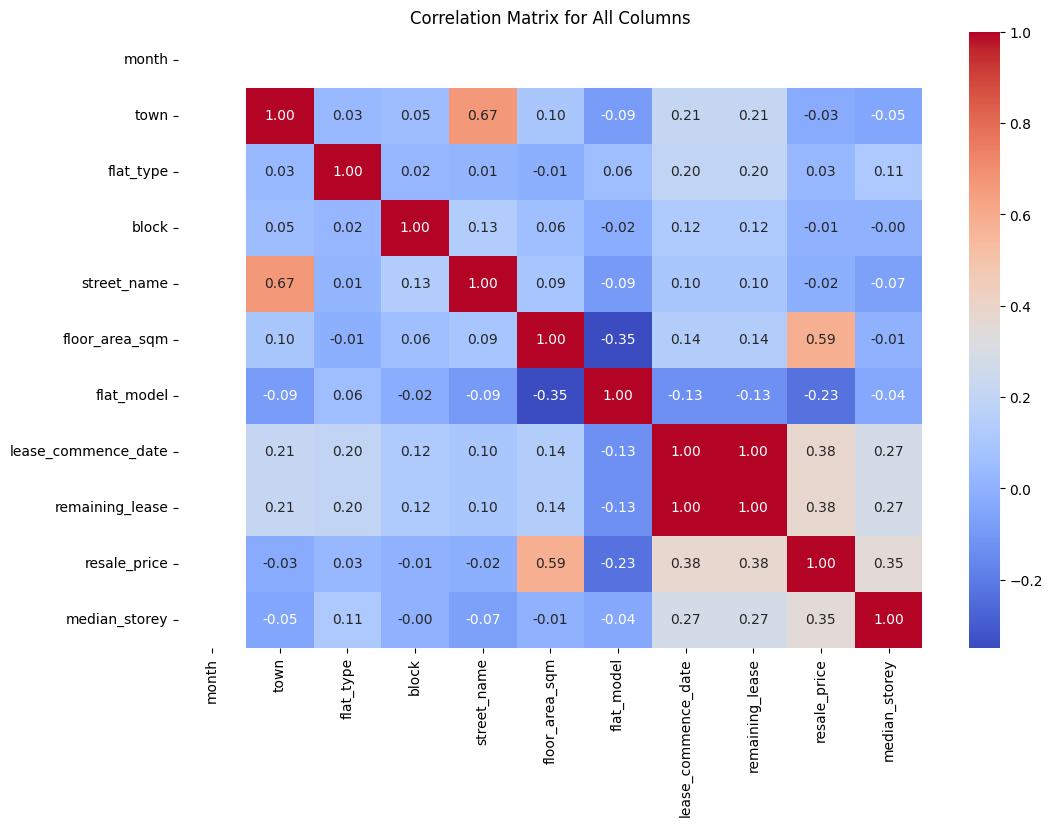

In [61]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Copy the original DataFrame
data_encoded = df.copy()

# Handle specific column like 'flat_type' if it contains patterns like "1-ROOM", "2-ROOM", etc.
if 'flat_type' in data_encoded.columns:
    # Ensure `flat_type` is not Categorical, convert it to string if necessary
    data_encoded['flat_type'] = data_encoded['flat_type'].astype(str)
    
    # Fill NaN values with a placeholder (e.g., "0-ROOM")
    data_encoded['flat_type'] = data_encoded['flat_type'].fillna("0-ROOM")
    
    # Extract numeric values, fill NaN with 0, and convert to integer
    data_encoded['flat_type'] = (
        data_encoded['flat_type']
        .str.extract(r'(\d+)')  # Extract numeric portion
        .fillna(0)  # Replace NaN with 0
        .astype(int)  # Convert to integer
    )

# Encode all remaining object-type columns using LabelEncoder
for col in data_encoded.select_dtypes(include=['object']).columns:
    try:
        data_encoded[col] = LabelEncoder().fit_transform(data_encoded[col])
    except Exception as e:
        print(f"Error encoding column {col}: {e}")

# Handle `month` column (if it exists)
if 'month' in data_encoded.columns:
    # Convert `month` to datetime, replacing invalid formats with NaT
    data_encoded['month'] = pd.to_datetime(data_encoded['month'], format='%Y-%m', errors='coerce')
    
    # Replace NaT with a placeholder date
    data_encoded['month'] = data_encoded['month'].fillna(pd.Timestamp("2000-01-01"))
    
    # Convert to numerical timestamp
    data_encoded['month'] = data_encoded['month'].astype('int64')

# Generate correlation matrix
correlation_matrix_all = data_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for All Columns")
plt.show()

Intepretation: This chart shows how different factors are related:

Flat size (floor area) and remaining lease have the strongest impact on resale price. Bigger flats and longer leases mean higher prices.
Flat type (e.g., 3-room, 5-room) has a smaller impact on price.
Things like block number or flat model don’t affect price much.
Streets and towns are closely linked (certain streets belong to certain towns).
In short, flat size and lease duration matter most for price.

# 5 Predictive Modelling

So our objective here is to build a machine learning model to predict resale prices based on features like location, flat type, remaining lease, and size.

We will use a smaller sample dataset from the combined dataset for faster and more optimized predicting

Firstly, let us install the necessary files

In [62]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Steps:
1. Prepare the dataset by encoding categorical variables and normalizing numerical features.
2. Train models such as linear regression, decision trees, or random forests.
3. Evaluate performance using metrics like R² and RMSE.

✅ Columns after cleaning: ['month', 'town', 'flat_type', 'block', 'street_name', 'floor_area_sqm', 'flat_model', 'lease_commence_date', 'remaining_lease', 'resale_price', 'median_storey']
📊 R² Score: 0.80
📉 RMSE: 77519.15


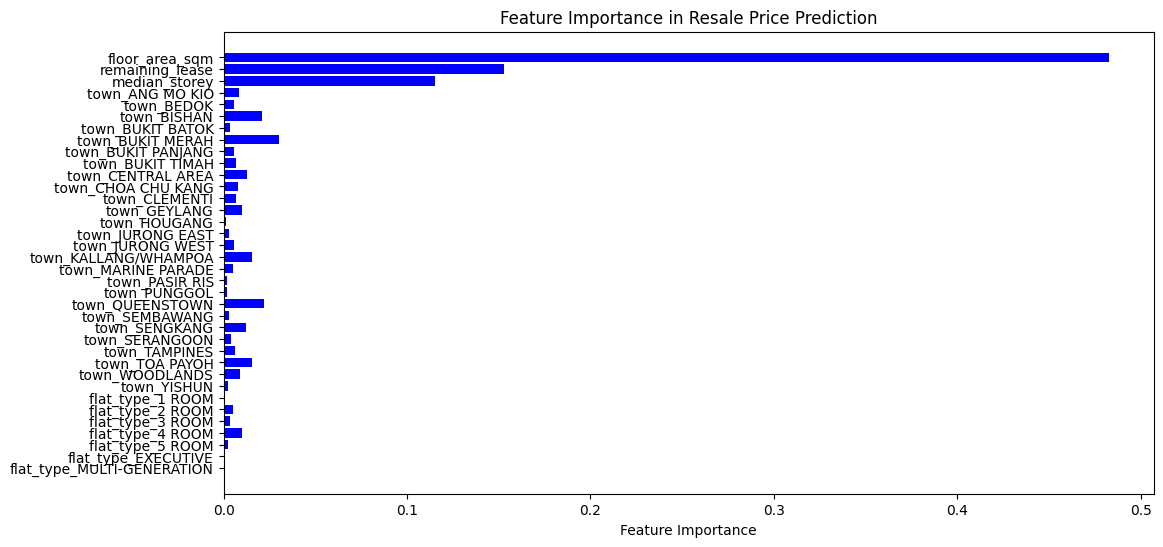

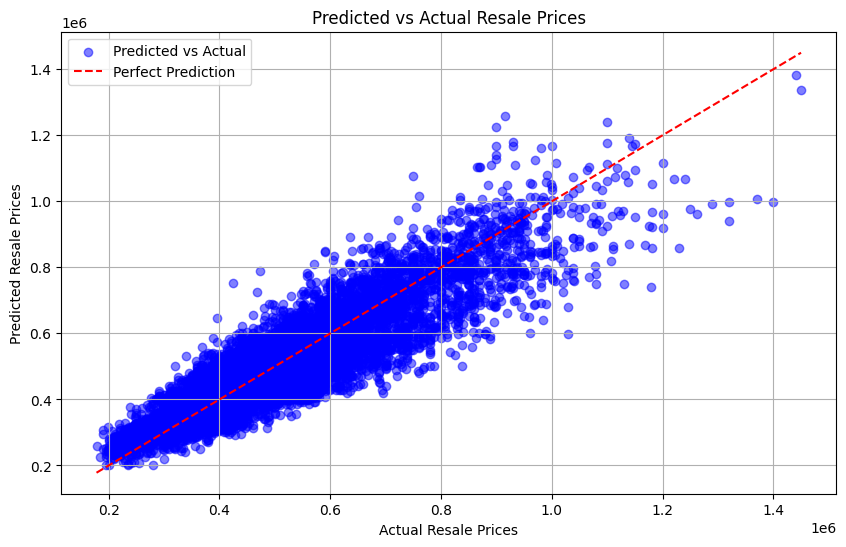

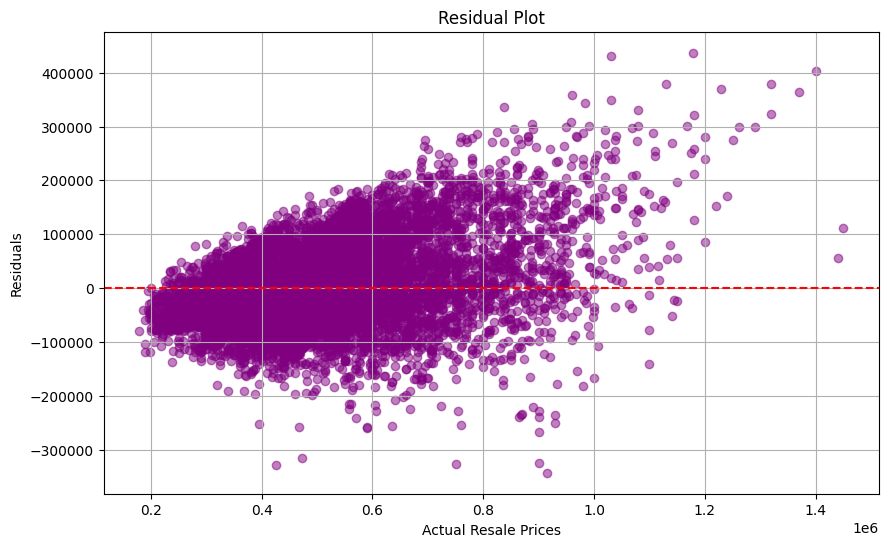

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

# 🔹 Step 1: Check and Clean Column Names
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces
df.columns = df.columns.str.replace(" ", "_")  # Replace spaces with underscores
print("✅ Columns after cleaning:", df.columns.tolist())  # Debugging

# 🔹 Step 2: Ensure 'median_storey' Exists Before Sampling
if 'median_storey' not in df.columns:
    print("❌ 'median_storey' column NOT found in df! Check your dataset.")
else:
    df_sampled = df.sample(n=50000, random_state=42).copy()  # Take a sample of 50,000 rows

# 🔹 Step 3: Select Features and Target
features = df_sampled[['town', 'flat_type', 'floor_area_sqm', 'remaining_lease', 'median_storey']].copy()
target = df_sampled['resale_price']

# 🔹 Step 4: Handle Missing Values
numerical_features = ['floor_area_sqm', 'remaining_lease', 'median_storey']
categorical_features = ['town', 'flat_type']

# Fill missing values
features[numerical_features] = features[numerical_features].fillna(features[numerical_features].median())
features[categorical_features] = features[categorical_features].fillna(features[categorical_features].mode().iloc[0])

# 🔹 Step 5: Remove NaN Before Scaling
features = features.dropna()
target = target.loc[features.index]  # Ensure target aligns with cleaned features

# 🔹 Step 6: Preprocessing Pipeline
preprocessor = ColumnTransformer([
    ('num', MinMaxScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
])

# 🔹 Step 7: Define and Train Model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=200, max_depth=20, n_jobs=-1, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# 🔹 Step 8: Predictions
y_pred = model.predict(X_test)

# 🔹 Step 9: Model Evaluation
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"📊 R² Score: {r2:.2f}")
print(f"📉 RMSE: {rmse:.2f}")

# 🔹 Step 10: Feature Importance Analysis
feature_names = (
    numerical_features +
    list(model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features))
)
feature_importance = model.named_steps['regressor'].feature_importances_

plt.figure(figsize=(12, 6))
plt.barh(feature_names, feature_importance, color='blue')
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Resale Price Prediction")
plt.gca().invert_yaxis()
plt.show()

# 🔹 Step 11: Predicted vs Actual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label="Predicted vs Actual", color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Prediction")
plt.title("Predicted vs Actual Resale Prices")
plt.xlabel("Actual Resale Prices")
plt.ylabel("Predicted Resale Prices")
plt.legend()
plt.grid()
plt.show()

# 🔹 Step 12: Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.5, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Actual Resale Prices")
plt.ylabel("Residuals")
plt.grid()
plt.show()


Feature Importance Analysis:
The first chart shows which factors have the most influence on predicting resale prices. Floor area (sqm) is by far the most important feature, followed by the remaining lease and the median storey level of the flat. This suggests that larger flats and those with longer remaining lease durations tend to have higher resale values. While towns and flat types do have some impact, they play a much smaller role compared to these three main factors.

Predicted vs Actual Resale Prices:
The second chart compares the predicted resale prices to the actual prices. Each blue dot represents a transaction, with the red dashed line indicating a perfect prediction (where predicted price = actual price). The majority of predictions closely follow the red line, meaning the model is performing well. However, there are some points further away, indicating cases where the model overestimated or underestimated the price.

Residual Plot (Prediction Errors):
The third chart visualizes the errors in prediction. Residuals (differences between actual and predicted prices) should ideally be randomly scattered around the zero line (red dashed line). While the spread is relatively balanced, some larger errors are observed for higher-priced properties, meaning the model struggles slightly with very expensive flats. Nonetheless, the overall distribution suggests that the model is generally accurate.

Now that we have our R² Score and RMSE, we will now interpret the results.

R² Score Range:
1.0: Perfect fit (model explains all the variance).
0.0: Model explains no variance.
Negative: Model performs worse than a horizontal line (mean prediction).

Our R² score: 0.80

This suggests that 80% of the variance in resale prices is explained by the model. While this is decent, there is room for improvement.

Our RMSE Score: 77519.15

This means the model's predictions are, on average, off by approximately SGD 77,519.15, not very good.

Evaluate Model Suitability
Is an R² of 0.80 acceptable for our use case?
For deployment (e.g., resale price prediction tools), aim for higher accuracy.
Compare RMSE to the range of resale prices.
If typical resale prices range between SGD 300,000 and SGD 800,000, an error of ~SGD 70,000 might be tolerable but could still impact user trust in predictions.
Therefore, we must refine the model.

Linear Regression

✅ Columns after cleaning: ['month', 'town', 'flat_type', 'block', 'street_name', 'floor_area_sqm', 'flat_model', 'lease_commence_date', 'remaining_lease', 'resale_price', 'median_storey']
📊 Linear Regression R² Score: 0.74
📉 Linear Regression RMSE: 89049.15
                       Feature    Coefficient
0               floor_area_sqm  722174.961146
1              remaining_lease  331850.311098
2                median_storey  229247.285107
9             town_BUKIT TIMAH  218228.874751
10           town_CENTRAL AREA  186857.768821
18          town_MARINE PARADE  178210.019970
21             town_QUEENSTOWN  131666.455268
5                  town_BISHAN  123759.432160
7             town_BUKIT MERAH  119662.501715
35  flat_type_MULTI-GENERATION   99888.110079
17        town_KALLANG/WHAMPOA   90954.646446
26              town_TOA PAYOH   84678.598920
12               town_CLEMENTI   69511.742755
13                town_GEYLANG   66852.502282
34         flat_type_EXECUTIVE   55775.207938
3     

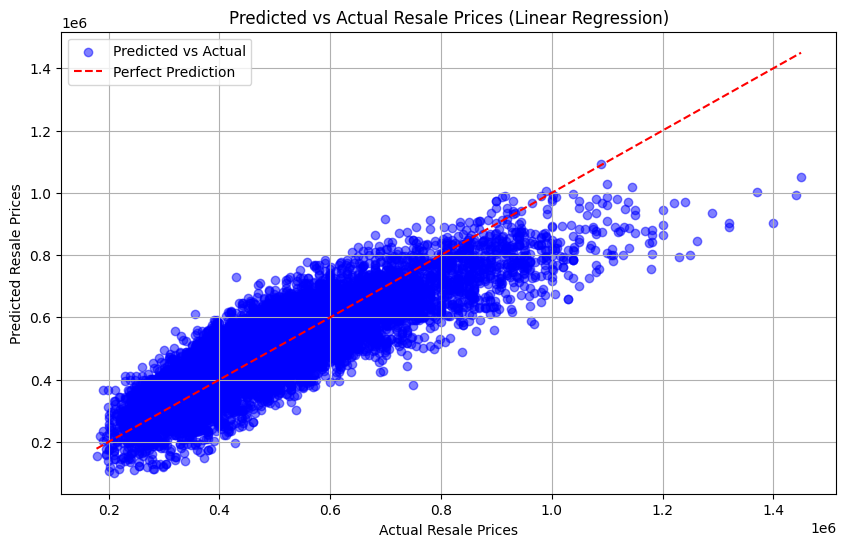

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

# 🔹 Step 1: Check and Clean Column Names
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces
df.columns = df.columns.str.replace(" ", "_")  # Replace spaces with underscores
print("✅ Columns after cleaning:", df.columns.tolist())  # Debugging

# 🔹 Step 2: Ensure 'median_storey' Exists Before Sampling
if 'median_storey' not in df.columns:
    print("❌ 'median_storey' column NOT found in df! Check your dataset.")
else:
    df_sampled = df.sample(n=50000, random_state=42).copy()  # Take a sample of 50,000 rows

# 🔹 Step 3: Select Features and Target
features = df_sampled[['town', 'flat_type', 'floor_area_sqm', 'remaining_lease', 'median_storey']].copy()
target = df_sampled['resale_price']

# 🔹 Step 4: Handle Missing Values
numerical_features = ['floor_area_sqm', 'remaining_lease', 'median_storey']
categorical_features = ['town', 'flat_type']

# Fill missing values
features[numerical_features] = features[numerical_features].fillna(features[numerical_features].median())
features[categorical_features] = features[categorical_features].fillna(features[categorical_features].mode().iloc[0])

# 🔹 Step 5: Remove NaN Before Scaling
features = features.dropna()
target = target.loc[features.index]  # Ensure target aligns with cleaned features

lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

lr_pipeline.fit(X_train, y_train)

# 🔹 Step 8: Predictions
y_pred = lr_pipeline.predict(X_test)

# 🔹 Step 9: Model Evaluation
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"📊 Linear Regression R² Score: {r2:.2f}")
print(f"📉 Linear Regression RMSE: {rmse:.2f}")

# 🔹 Step 10: Feature Importance Analysis
feature_names = (
    numerical_features +
    list(lr_pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features))
)

# Get the coefficients from the linear regression model
coefficients = lr_pipeline.named_steps['regressor'].coef_

# Create a DataFrame to display coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by="Coefficient", ascending=False)

# Print feature importance
print(coef_df)

# 🔹 Step 11: Predicted vs Actual Plot

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label="Predicted vs Actual", color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Prediction")
plt.title("Predicted vs Actual Resale Prices (Linear Regression)")
plt.xlabel("Actual Resale Prices")
plt.ylabel("Predicted Resale Prices")
plt.legend()
plt.grid()
plt.show()



📊 Polynomial Regression R²: 0.80
📉 Polynomial Regression RMSE: 78718.74


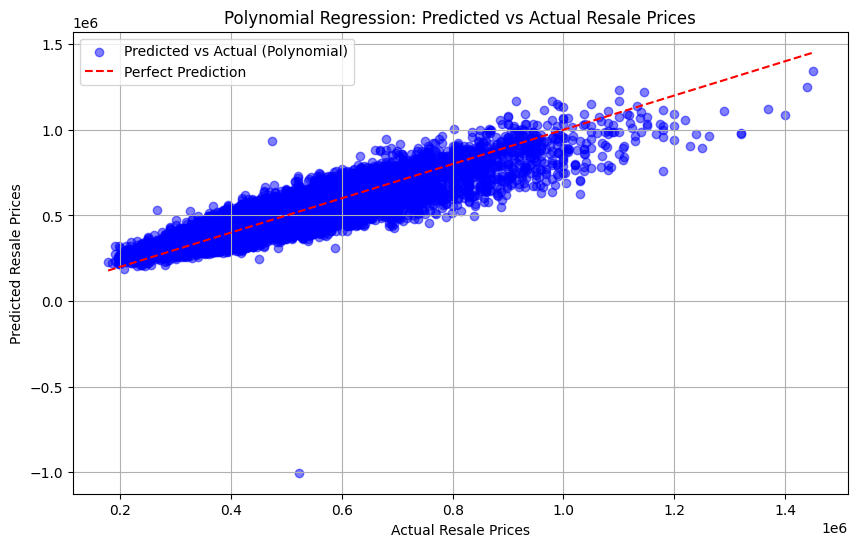

In [66]:
from sklearn.preprocessing import PolynomialFeatures

# Create a pipeline with polynomial features and linear regression
poly_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Preprocessing (scaling + encoding)
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),  # Generate polynomial terms (quadratic)
    ('regressor', LinearRegression())
])

# Train the model
poly_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_poly = poly_pipeline.predict(X_test)

# Evaluate model
r2_poly = r2_score(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

print(f"📊 Polynomial Regression R²: {r2_poly:.2f}")
print(f"📉 Polynomial Regression RMSE: {rmse_poly:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, alpha=0.5, color='blue', label="Predicted vs Actual (Polynomial)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Prediction")
plt.xlabel("Actual Resale Prices")
plt.ylabel("Predicted Resale Prices")
plt.title("Polynomial Regression: Predicted vs Actual Resale Prices")
plt.legend()
plt.grid()
plt.show()

Decision Tree

XGBoost

AdaBoost

SVM

✅ Columns after cleaning: ['month', 'town', 'flat_type', 'block', 'street_name', 'floor_area_sqm', 'flat_model', 'lease_commence_date', 'remaining_lease', 'resale_price', 'median_storey']
📊 R² Score: 0.43
📉 RMSE: 130983.04
⚠ Note: SVM does not provide feature importance scores.


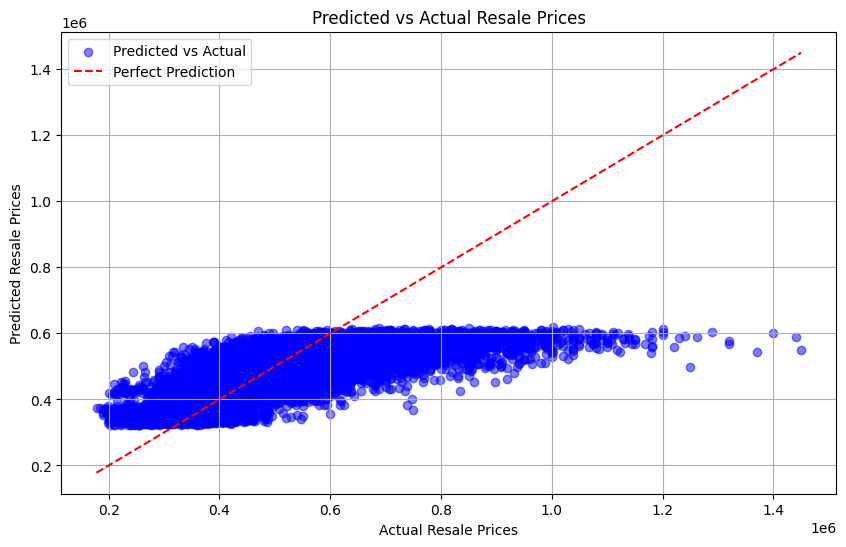

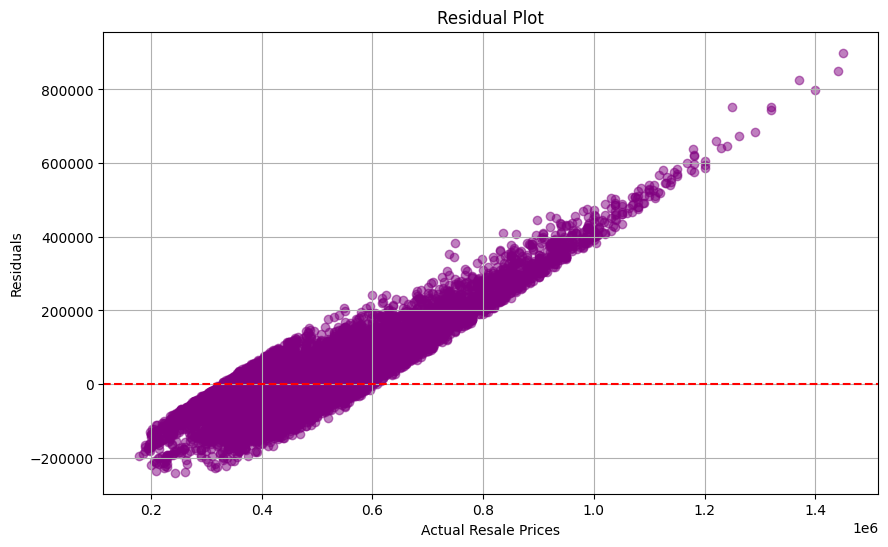

In [23]:
# 🔹 Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error


# ✅ Check and clean column names
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces
df.columns = df.columns.str.replace(" ", "_")  # Replace spaces with underscores
print("✅ Columns after cleaning:", df.columns.tolist())  # Debugging

# 🔹 Step 3: Ensure 'median_storey' Exists Before Sampling
if 'median_storey' not in df.columns:
    print("❌ 'median_storey' column NOT found in df! Check your dataset.")
    exit()  # Stop execution if column is missing
else:
    df_sampled = df.sample(n=50000, random_state=42).copy()  # Take a sample of 50,000 rows

# 🔹 Step 4: Select Features and Target
features = df_sampled[['town', 'flat_type', 'floor_area_sqm', 'remaining_lease', 'median_storey']].copy()
target = df_sampled['resale_price']

# 🔹 Step 5: Handle Missing Values
numerical_features = ['floor_area_sqm', 'remaining_lease', 'median_storey']
categorical_features = ['town', 'flat_type']

# ✅ Fill missing values
features[numerical_features] = features[numerical_features].fillna(features[numerical_features].median())
features[categorical_features] = features[categorical_features].fillna(features[categorical_features].mode().iloc[0])

# 🔹 Step 6: Remove NaN Before Scaling
features = features.dropna()
target = target.loc[features.index]  # Ensure target aligns with cleaned features

# 🔹 Step 7: Define Preprocessing Pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
])

# 🔹 Step 8: Define and Train SVM Model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1))
])

# ✅ Split Data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# ✅ Train Model
model.fit(X_train, y_train)

# 🔹 Step 9: Make Predictions
y_pred = model.predict(X_test)

# 🔹 Step 10: Evaluate Model Performance
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"📊 R² Score: {r2:.2f}")
print(f"📉 RMSE: {rmse:.2f}")

# 🔹 Step 11: Feature Importance Not Available for SVM
print("⚠ Note: SVM does not provide feature importance scores.")

# 🔹 Step 12: Predicted vs Actual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label="Predicted vs Actual", color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Prediction")
plt.title("Predicted vs Actual Resale Prices")
plt.xlabel("Actual Resale Prices")
plt.ylabel("Predicted Resale Prices")
plt.legend()
plt.grid()
plt.show()

# 🔹 Step 13: Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.5, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Actual Resale Prices")
plt.ylabel("Residuals")
plt.grid()
plt.show()

The first chart compares the predicted resale prices to the actual prices. Each blue dot represents a transaction, while the red dashed line represents a perfect prediction where the predicted price matches the actual price. In this case, the majority of predictions fall below the red line, indicating that the model tends to underpredict higher-value properties. The predictions appear to flatten around the SGD 400K-600K range, suggesting that the model struggles to capture price variations in high-end flats. Additionally, several data points deviate significantly from the red line, meaning that in some cases, the model either overestimates or underestimates resale prices by a substantial margin.

The second chart, the residual plot, visualizes the errors in prediction. Ideally, residuals—the difference between actual and predicted prices—should be randomly scattered around the zero line (red dashed line). However, in this case, the residuals display a clear pattern, where errors tend to increase for higher-priced flats. This suggests that the SVR model underestimates expensive properties while overestimating lower-priced ones. Such a pattern indicates that the model may not be flexible enough to capture the full complexity of the resale market, particularly in areas where resale prices vary widely due to factors like location, lease duration, and flat type.

Overall, the model achieved an R² score of 0.43, meaning it explains 43% of the variance in resale prices. While this suggests that the model captures some general trends, there is significant room for improvement. The Root Mean Squared Error (RMSE) of SGD 130,983 indicates that, on average, the model’s predictions deviate by around SGD 131K, which is relatively high considering resale prices typically range between SGD 200K and SGD 1.4M. This level of error may impact the reliability of the model for real-world applications, especially for buyers and sellers who depend on accurate price estimates.

To enhance performance, the model could benefit from hyperparameter tuning by optimizing C, gamma, and epsilon in the SVR algorithm. Additionally, feature engineering could improve predictions by incorporating factors such as MRT proximity, transaction month, lease commencement year, and block-level attributes. Finally, exploring alternative models like XGBoost, LightGBM, or Neural Networks may help capture the non-linear relationships present in HDB resale prices, leading to more precise predictions across all price ranges.

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline

# 🔹 Define SVR hyperparameter grid
param_grid = {
    'regressor__C': [10, 100],  # Regularization strength
    'regressor__gamma': [0.01, 0.1],  # Kernel coefficient
    'regressor__epsilon': [0.1, 1]  # Margin of error tolerance
}

# 🔹 Create pipeline (preprocessing + SVR)
model = Pipeline([
    ('preprocessor', preprocessor),  # Preprocessing pipeline from previous code
    ('regressor', SVR(kernel='rbf'))
])

# 🔹 Run Grid Search with 5-fold Cross-Validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# 🔹 Print Best Parameters
print("✅ Best Parameters:", grid_search.best_params_)

# 🔹 Train final model with best parameters
best_svr = grid_search.best_estimator_
y_pred_best = best_svr.predict(X_test)

# 🔹 Evaluate Improved Model
r2_best = r2_score(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))

print(f"📊 Improved R² Score: {r2_best:.2f}")
print(f"📉 Improved RMSE: SGD {rmse_best:.2f}")


Fitting 5 folds for each of 8 candidates, totalling 40 fits
✅ Best Parameters: {'regressor__C': 100, 'regressor__epsilon': 0.1, 'regressor__gamma': 0.1}
📊 Improved R² Score: 0.43
📉 Improved RMSE: SGD 130983.04


 ## Hyperparameter Tuning Results for SVR
After performing Grid Search Cross-Validation (GridSearchCV), the best hyperparameters for the Support Vector Regression (SVR) model were identified as follows:

C = 100 → Higher regularization strength, allowing the model to fit the data more flexibly.
Epsilon = 0.1 → Defines a tighter margin for errors, making predictions more precise.
Gamma = 0.1 → Controls the influence of a single training example; a moderate value helps balance model complexity.
The model was trained using 5-fold cross-validation, testing 8 different parameter combinations, resulting in 40 total fits.

## Model Performance Analysis
📊 R² Score: 0.43
The model explains 43% of the variance in resale prices, meaning it captures some patterns but leaves 57% unexplained. This suggests that additional features or a different model may be needed for better accuracy.

📉 RMSE: SGD 130,983.04
The Root Mean Squared Error (RMSE) of SGD 130,983 means that the model's predicted prices deviate from actual prices by this amount on average. Given that HDB resale prices range from ~SGD 200K to 1.4M, this error is relatively high and may impact its usability in real-world applications.